# **IMPORTANDO INFOMACIÓN DE LA API**

Definimos la biblioteca necesaria para extraer la infomación de la API de Mercado Libre

In [200]:
import requests

Definimos la función para obtener los items ID de la API acorde a nuestro criterio de búsqueda.

In [201]:
def items_API(query, max_items):
    url = "https://api.mercadolibre.com/sites/MLA/search"
    params = {
        "q": query,  # Palabra clave de búsqueda
        "limit": 50
    }
    items = []
    offset = 0

    while len(items) < max_items:
        params["offset"] = offset #El offset maneja la paginación

# Realizar la solicitud a la API
        response = requests.get(url, params=params)
        if response.status_code != 200:
            print(f"Error: {response.status_code}")  #Se rompe la iteración si el proceso no es exitoso
            break

# Convertimos la respuesta a un formato JSON
        data = response.json()

 # Agregamos los items a una lista
        items.extend(data["results"])

# Verificar si hay más ítems
        if len(data["results"]) < 50:
            break  # No hay más ítems

        # Actualizar el offset para la siguiente página
        offset += 50

    return items[:max_items]  # Devolver solo los ítems solicitados

# Obtener ítems para cada término de búsqueda
terminos = ["Samsung S24 Ultra", "Iphone 16", "Google Pixel 9 Pro"]
max_items = 150
items_totales = []

for termino in terminos:
    print(f"Obteniendo ítems para: {termino}")
    items = items_API(termino, max_items)
    items_totales.extend(items)

print(f"Total de ítems obtenidos: {len(items_totales)}")



Obteniendo ítems para: Samsung S24 Ultra
Obteniendo ítems para: Iphone 16
Obteniendo ítems para: Google Pixel 9 Pro
Total de ítems obtenidos: 214


Obtenemos datos de cada Item ID

In [202]:
#
def items_API_detalle(item_id):
    url = f"https://api.mercadolibre.com/items/{item_id}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error al obtener el información sobre ítem {item_id}: {response.status_code}")
        return None

# Creamos la lista para almacenar los detalles de cada item y realizamos una iteración para repetir el proceso para cada itemId
items_detalle = []

for item in items_totales:
    item_id = item["id"]
    detalle = items_API_detalle(item_id)
    if detalle:
        items_detalle.append(detalle)

print(f"Detalles de items obtenidos: {len(items_detalle)}")

Detalles de items obtenidos: 214


# **CREACIÓN DE UN DATAFRAME CON LA DATA DE LA API**

In [203]:
#Importamos la librería pandas
import pandas as pd

# Crear un DataFrame con los detalles de los ítems
df = pd.DataFrame(items_detalle)

A partir de la creación del dataFrame, consultamos las columnas que posee en busca de decidir cuales son las más útiles para nuestro análsis.

In [204]:
df.columns.tolist()


['id',
 'site_id',
 'title',
 'seller_id',
 'category_id',
 'official_store_id',
 'price',
 'base_price',
 'original_price',
 'currency_id',
 'initial_quantity',
 'sale_terms',
 'buying_mode',
 'listing_type_id',
 'condition',
 'permalink',
 'thumbnail_id',
 'thumbnail',
 'pictures',
 'video_id',
 'descriptions',
 'accepts_mercadopago',
 'non_mercado_pago_payment_methods',
 'shipping',
 'international_delivery_mode',
 'seller_address',
 'seller_contact',
 'location',
 'coverage_areas',
 'attributes',
 'listing_source',
 'variations',
 'status',
 'sub_status',
 'tags',
 'warranty',
 'catalog_product_id',
 'domain_id',
 'parent_item_id',
 'deal_ids',
 'automatic_relist',
 'date_created',
 'last_updated',
 'health',
 'catalog_listing']

In [205]:
#Columnas seleccionadas para análisis.
columnas_analisis = [
    "id", "title", "seller_id", "official_store_id", "price", "currency_id",
    "initial_quantity", "condition", "shipping","international_delivery_mode", "location", "attributes", "status","warranty", "date_created"]

In [206]:
df_analisis = df[columnas_analisis]

In [207]:
#Nuevo dataFrame compuesto solo por las columnas seleccionadas
df_analisis.sample(5)

,id,title,seller_id,official_store_id,price,currency_id,initial_quantity,condition,shipping,international_delivery_mode,location,attributes,status,warranty,date_created,last_updated
209,MLA1468084871,Google Pixel 9 Pro Fold Dual Sim 256 Gb 16 Gb ...,24284351,NaN,3100000.00,ARS,1,used,"{'mode': 'not_specified', 'methods': [], 'tags...",none,{},"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",active,Sin garantía,2024-12-20T16:33:46.663Z,2025-01-31T18:59:05.878Z
11,MLA1465466577,Samsung S24 Ultra 512gb 12ram,1054114229,NaN,1850000.00,ARS,1,new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,{},"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",active,Garantía del vendedor: 3 meses,2024-12-16T14:24:54.610Z,2025-02-05T11:21:20.264Z
197,MLA1456631127,Google Pixel 9 Pro Xl 16gb Ram 128gb Sellado,1473497418,NaN,2049999.00,ARS,2,new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,{},"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",active,Garantía del vendedor: 3 meses,2024-10-23T18:03:23.108Z,2025-01-19T15:29:36.834Z
67,MLA1993798646,Samsung Galaxy S24 Ultra 5g 512 Gb Gris Titani...,47002151,NaN,2300000.00,ARS,1,new,"{'mode': 'me2', 'methods': [], 'tags': ['local...",none,{},"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",active,Garantía de fábrica: 6 meses,2025-01-11T00:54:54.834Z,2025-02-05T04:25:38.002Z
169,MLA2009523720,iPhone 16 Pro Max Nuevo.,92876453,NaN,2500000.00,ARS,2,new,"{'mode': 'me2', 'methods': [], 'tags': ['local...",none,{},"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",active,Sin garantía,2025-02-06T16:51:36.741Z,2025-02-06T16:55:30.198Z


Procedemos a guardar el dataFrame generado con nuestras columnas a analizar en un archivo en formato CSV

# **INFORMACIÓN GUARDADA EN FORMATO CSV**

In [208]:
# Guardar en un archivo CSV
df_analisis.to_csv("items_mercado_libre.csv", index=False)
print("CSV guardado correctamente.")

CSV guardado correctamente.


# **EDA (Análisis exploratorio)**

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Cargamos los datos desde el CSV
df = pd.read_csv("items_mercado_libre.csv")



In [210]:
#Vemos las dimensiones de nuestro dataframe
df.shape

(214, 16)

In [211]:
#Buscamos la cantidad de datos nulos por columna
df.isnull().sum()

,0
id,0
title,0
seller_id,0
official_store_id,202
price,0
currency_id,0
initial_quantity,0
condition,0
shipping,0
international_delivery_mode,0


In [212]:
#Cambiamos formato para mostrar números únicamente con dos decimales
pd.options.display.float_format = '{:.2f}'.format

In [213]:
#Analizamos nuestras variables númericas
df.describe()

,seller_id,official_store_id,price,initial_quantity
count,214.00,12.00,214.00,214.00
mean,716279412.00,33193.75,2383578.92,10.23
std,752961826.41,49363.11,743836.68,43.00
min,456651.00,306.00,700000.00,1.00
25%,92908685.25,1756.75,1850000.00,1.00
50%,308026717.50,2549.00,2284500.00,2.00
75%,1437562941.00,66174.75,2800000.00,10.00
max,2249684384.00,136946.00,4619990.00,593.00


In [257]:
#Analicemos nuestras variables categóricas
df.describe(include= ["object", "bool"])

,id,title,currency_id,condition,shipping,international_delivery_mode,location,attributes,status,warranty,last_updated,warranty_options,brand
count,214,214,214,214,214,214,214,214,214,211,214,214,214
unique,214,189,1,2,22,2,1,193,1,20,214,3,3
top,MLA1430152419,Apple iPhone 16 (128gb) - Caja Sellada + Cargador,ARS,new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,{},"[{'id': 'ALPHANUMERIC_MODELS', 'name': 'Modelo...",active,Garantía de fábrica: 1 años,2025-02-05T19:15:34.100Z,Fábrica,Apple
freq,1,3,214,190,42,200,214,5,214,71,1,143,99


* En nuestra muestra hay 214 vendedores únicos.
* Hay 12 publicaciones vendidas por tiendas oficiales los celulares seleccionados.
* La única modena en nuestra muestra es el peso argentino.
* El precio promedio de los celulares es de $2.383.578, la opción más barata cuesta $700.000 y la más cara $4.619.990.
* La mayoria de vendedores comienza con 8 productos en stock, y el vendedor que más celulares ha tenido en stock, tuvo 101 celulares en stock.
* 188 publicaciones es sobre celulares nuevos, siendo solo 26 sobre celulares usados.
* 200 publicaciones no tienen envio intenarnacional y 14 si lo tienen.
* Hay 19 tipos de garantías distintas, la más usual corresponde a la garantía de fábrica de un año.


In [215]:
# Veamos la distribución de algunas categorías porcentualmente
print(df["condition"].value_counts(normalize= True)* 100)
print(df["international_delivery_mode"].value_counts(normalize= True)* 100)
print(df["warranty"].value_counts(normalize= True)* 100)
print(df["title"].value_counts(normalize= True)* 100)



condition
new    88.79
used   11.21
Name: proportion, dtype: float64
international_delivery_mode
none   93.46
DDP     6.54
Name: proportion, dtype: float64
warranty
Garantía de fábrica: 1 años      33.65
Garantía de fábrica: 12 meses    21.33
Sin garantía                     13.27
Garantía del vendedor: 3 meses    9.00
Garantía de fábrica: 30 días      4.74
Garantía del vendedor: 6 meses    3.79
Garantía de fábrica: 6 meses      3.79
Garantía del vendedor: 30 días    1.90
Garantía de fábrica: 1 meses      1.42
Garantía del vendedor: 1 años     1.42
Garantía del vendedor: 10 días    0.95
Garantía de fábrica: 7 meses      0.95
Garantía del vendedor: 90 días    0.47
Garantía de fábrica: 90 días      0.47
Garantía del vendedor: 60 días    0.47
Garantía de fábrica: 1 días       0.47
Garantía del vendedor: 7 días     0.47
Garantía de fábrica: 12 años      0.47
Garantía del vendedor: 15 días    0.47
Garantía de fábrica: 3 meses      0.47
Name: proportion, dtype: float64
title
Apple iPhone 16 

* 87.85% de los celulares publicados corresponden a equipos nuevos
* Solo el 6.54% de las publicaciones tienen como modo de envio DDL, un tipo de servicio de envios courier.
* Respecto a la garantía, podemos observar 3 grandes categorías, a continuación tranformaremos la columna para un mejor análisis.

In [216]:
#Transformenos la variable warranty para considerar solo 3 opciones, garantía del vendedor, de fábrica o sin garantía.
condicionesWarranty = [
    df['warranty'].str.contains('vendedor', case=False, na=False),
    df['warranty'].str.contains('fábrica', case=False, na=False),
    df['warranty'].str.contains('sin garantía', case=False, na=False)
]

# Definir valores asignados a las categorías
valores = ['Vendedor', 'Fábrica', 'Sin garantía']

# Crear nueva columna con las categorías reducidas
df['warranty_options'] = np.select(condicionesWarranty, valores, default='Sin garantía')

print(df["warranty_options"].value_counts(normalize= True)* 100)

warranty_options
Fábrica        66.82
Vendedor       18.69
Sin garantía   14.49
Name: proportion, dtype: float64


* Luego de la transformación podemos afirmar que el 66.82% de las publicaciones cuentan con garantía de fábrica, el 18.22% la misma garantía es proveída por el vendedor y el 14.95% no posee garantía.

In [217]:
#Transformenos la variable title para crear una category "brand" con 3 opciones, Samsung , Google y Apple
condicionesBrand = [
    df['title'].str.contains('Iphone', case=False, na=False),
    df['title'].str.contains('Google', case=False, na=False),
    df['title'].str.contains('Samsung', case=False, na=False)
]

# Definir valores asignados a las categorías
valores = ['Apple', 'Google', 'Samsung']

# Crear nueva columna con las categorías reducidas
df['brand'] = np.select(condicionesBrand, valores, default='Otro')

print(df["brand"].value_counts(normalize= True)* 100)

brand
Apple     46.26
Samsung   42.99
Google     8.41
Otro       2.34
Name: proportion, dtype: float64


In [218]:
# Controlamos la categoría "Otro" para ver a que celular corresponde
rows_con_otro = df[df['brand'] == 'Otro']

print(rows_con_otro["title"])

29                              S24 Ultra Black - 256gb
42       Galaxy S24 Ultra Titanium Black 12gb Ram 256gb
46                    Galaxy S24 Ultra 512 Gb (sin Uso)
48    S 24 Ultra - Caja Sellada - 512-negro Con Carg...
68    S 24 Ultra - Caja Sellada - Leer Todo Con Carg...
Name: title, dtype: object


Las 5 opciones de otro corresponden a celulares de la marca Samsung

In [219]:
# Cambiar las filas con opción otro a Samsung
df.loc[df['brand'] == 'Otro', 'brand'] = 'Samsung'

* De las publicaciones analizadas, 46.26 corresponden a Apple y al Iphone 16 , 45.33 al Samsung S24 y solo 8.41 a Google Pixel.

In [220]:
df.sample(5)

,id,title,seller_id,official_store_id,price,currency_id,initial_quantity,condition,shipping,international_delivery_mode,location,attributes,status,warranty,date_created,last_updated,warranty_options,brand
130,MLA1950375550,Apple iPhone 16 (128gb) - Caja Sellada + Cargador,1963351163,NaN,2749999.00,ARS,10,new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,{},"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",active,Garantía de fábrica: 12 meses,2024-11-04T01:21:47.482Z,2025-02-07T01:49:29.504Z,Fábrica,Apple
145,MLA1967992034,Nuevo iPhone 16 Pro Max 256gb Titanio- Regalo ...,1983635245,NaN,2999000.00,ARS,10,new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,{},"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",active,Garantía de fábrica: 6 meses,2024-11-29T13:19:03.578Z,2025-01-27T20:38:49.512Z,Fábrica,Apple
207,MLA1446567217,Google Pixel 9 Pro Xl 256gb 16gb Ram Android S...,249912510,NaN,2999999.00,ARS,2,new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,{},"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",active,Garantía de fábrica: 1 años,2024-08-29T07:59:23.610Z,2025-01-06T00:33:49.958Z,Fábrica,Google
198,MLA1455326651,Google Pixel 9 Pro Xl 256gb 16gb Ram Android B...,1473497418,NaN,2869499.00,ARS,2,new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,{},"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",active,Garantía del vendedor: 6 meses,2024-10-15T17:34:26.180Z,2024-12-19T16:33:32.714Z,Vendedor,Google
184,MLA2007517140,Apple iPhone 16 Pro Max 256gb 8gb Ram Desert T...,1996082170,NaN,2799990.00,ARS,1,new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,{},"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",active,Garantía de fábrica: 1 años,2025-02-04T12:47:39.884Z,2025-02-04T12:50:19.070Z,Fábrica,Apple


In [226]:
#Convertiremos la columna 'date_created' a formato datetime para que sea más legible
df['date_created'] = pd.to_datetime(df['date_created'])

# Creamos columna con el mes de creación del producto
df['CreationMonth'] = df['date_created'].dt.to_period('M')  # Agrupa por mes y año




<ipython-input-226-e2c20a2bff24>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['CreationMonth'] = df['date_created'].dt.to_period('M')  # Agrupa por mes y año


# **VISUALIZACIÓN**

Utilizaremos las librerías de matplotlib y seaborn

Text(0, 0.5, 'Precio')

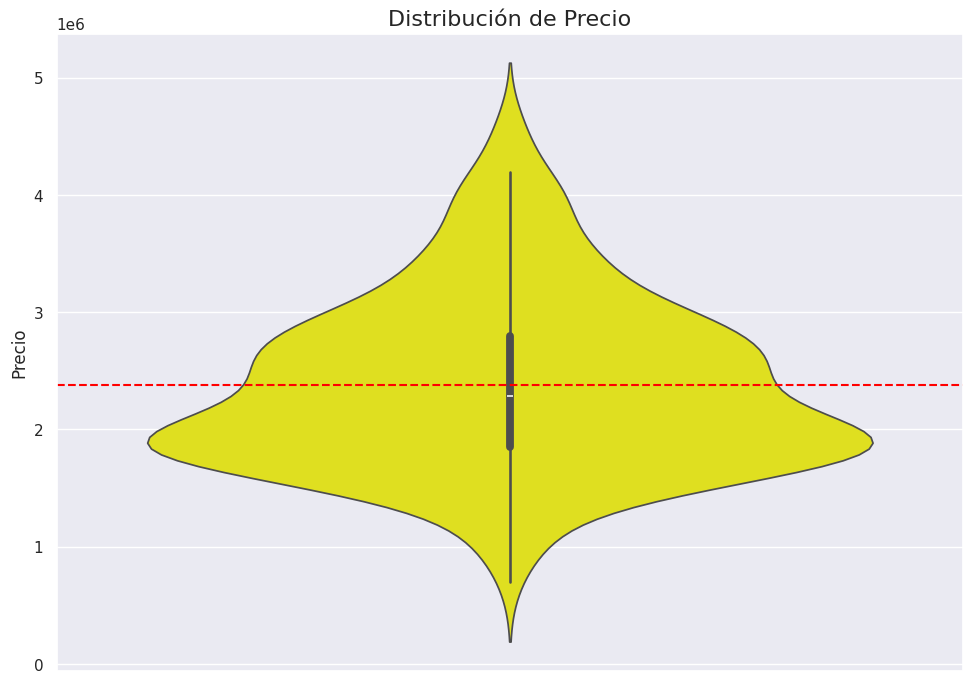

In [256]:
#Distribución de precio - Violin Plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
violinPlot = sns.violinplot(df.price, orient='v', color='yellow')
violinPlot.axhline(df.price.mean(), color='red', linestyle='--', label='Media')
plt.title('Distribución de Precio', fontsize=16)
plt.ylabel('Precio', fontsize=12)

* Este gráfico nos muestra la distribución de los precios en general. En base a esto , se puede observar que el grueso de nuestra muestra se halla en un precio que va entre 1 millon de pesos y 3 millones de pesos.

* El precio promedio es $2383578.92 ARS , como analizamos anteriormente y marcado por la línea roja de media.


Text(0.5, 1.02, 'Cantidad de productos publicados por precio en millones de pesos')

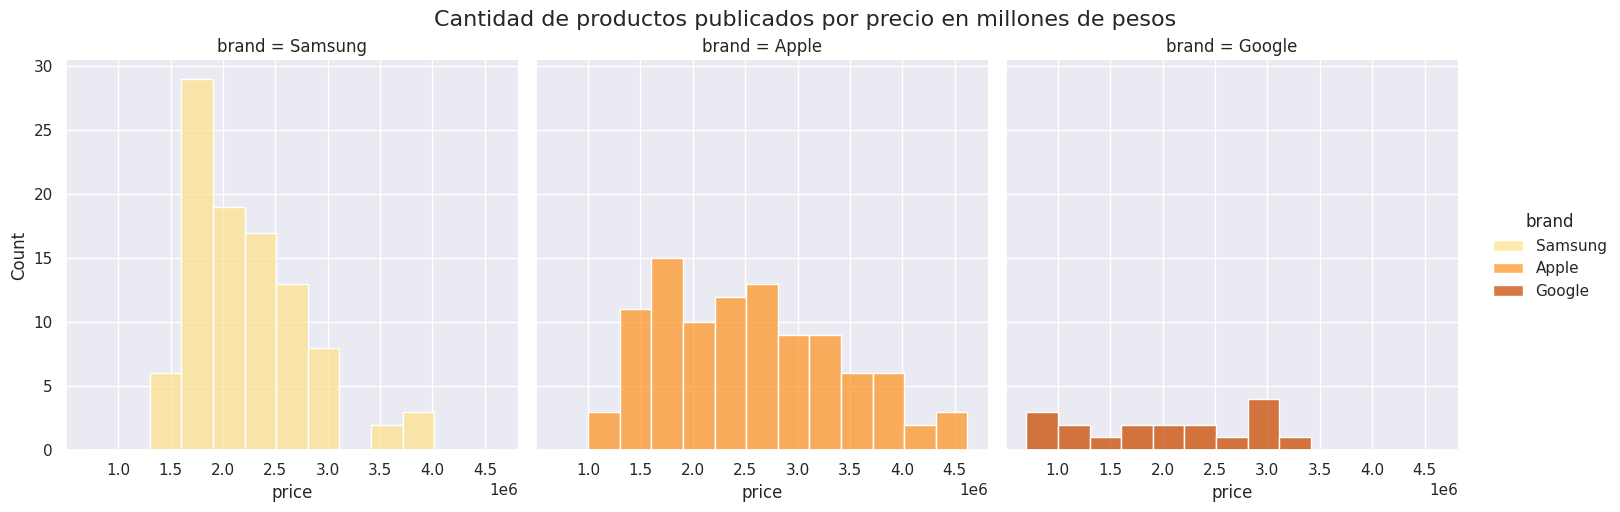

In [244]:
#Displot para observar la distribución de precios entre las diferentes marcas
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data=df, x= "price", hue="brand", multiple="stack", col="brand",palette='YlOrBr')
plt.suptitle('Cantidad de productos publicados por precio en millones de pesos', y=1.02, fontsize=16)

En cuanto a los productos de Apple y Google , se observa una mayor variación en el precio. Los rangos de los productos van desde 1 millon de pesos hasta 4 millones en su mayoria para el caso de Apple y hasta 3 millones para el caso de Google.  Mientras que los de Samsung se puede observar que los precios no varian de la misma forma y se encuentran en su mayoria entre los 1.5 y 3 millones de pesos

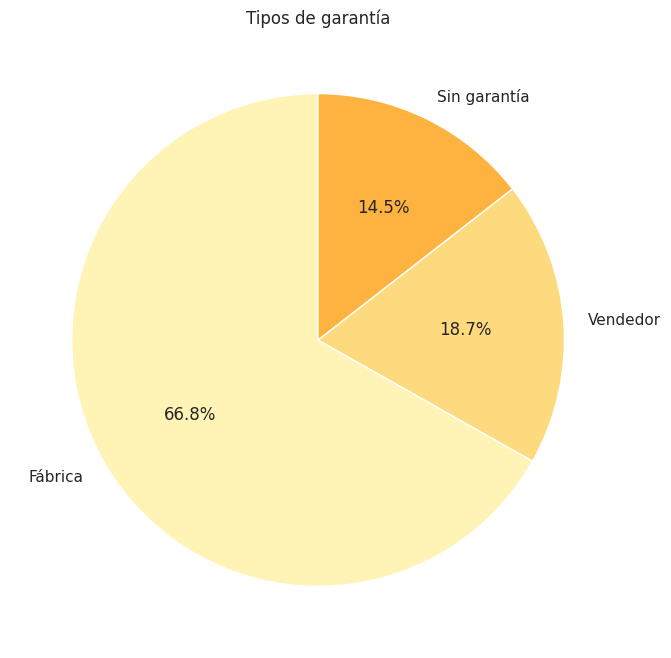

In [223]:
# Gráfico de torta para observar los tipos de garantía
pieChart = df['warranty_options'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pieChart, labels=pieChart.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlOrBr'))
plt.title('Tipos de garantía')
plt.show()

La mayoría de los productos poseen garantía 85.5% , sol un 14.5% no poseen ningún tipo de garantía

Text(0.5, 1.02, 'Cantidad de productos según tipo de garantía y condición')

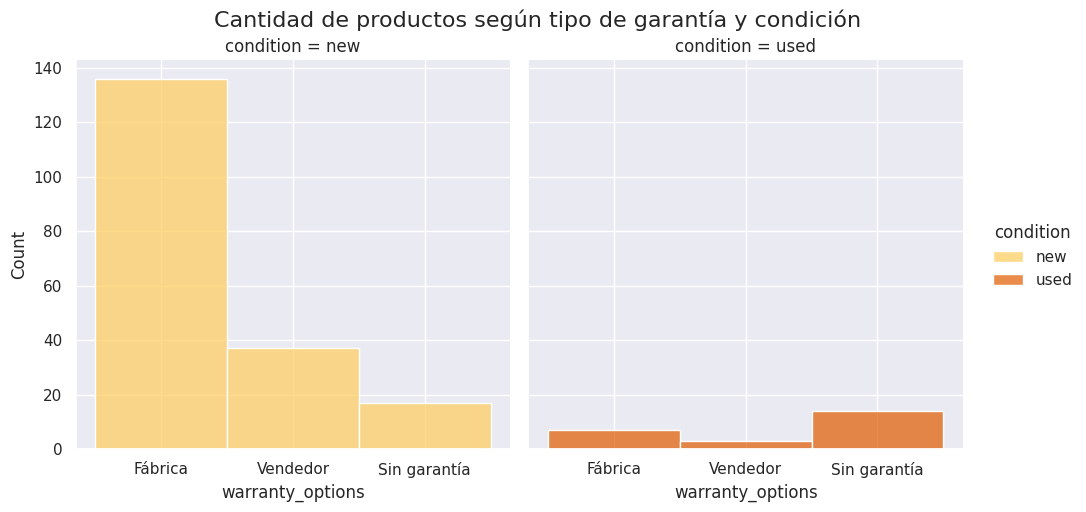

In [253]:
#Gráfico de barras para analizar las opciones de garantía según la condición del producto.
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax= sns.displot(data=df, x= "warranty_options",hue= "condition", multiple= "stack", col= "condition",palette='YlOrBr' )
plt.suptitle('Cantidad de productos según tipo de garantía y condición', y=1.02, fontsize=16)


* Se observa que en los productos nuevos, la garantía de fábrica es altamente predominante y la garantía del vendedor también juega un papel importante.

* En cuanto a los productos usados, no sorprende que la mayoria de las opciones no cuenten con garantía. Lo que sí sorprende es que se vendan productos usados con garantía de fábrica, algo que podría someterse a revisión.

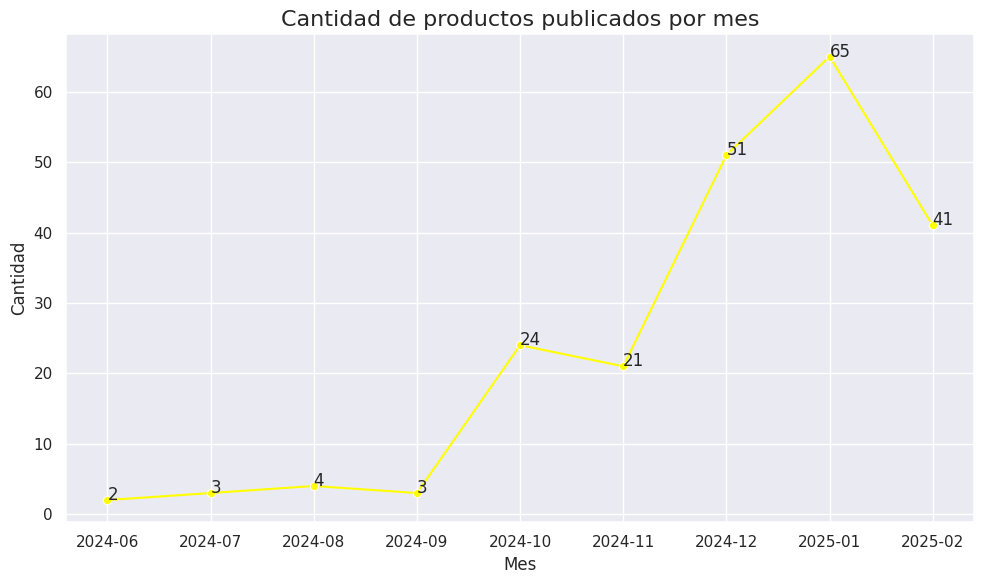

In [239]:
# Contamos cantidad de publicaciones por mes y convertimos a string month para gráficar
productos_por_mes = df.groupby('CreationMonth').size().reset_index(name='count')
productos_por_mes['CreationMonth'] = productos_por_mes['CreationMonth'].astype(str)

# Gráfico de lineas de productos publicados por mes.
plt.figure(figsize=(10, 6))
sns.lineplot(data=productos_por_mes, x='CreationMonth', y='count', marker='o',color='yellow')
plt.title('Cantidad de productos publicados por mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

#Etiquetas para cada punto
for i, row in productos_por_mes.iterrows():
    plt.text(
        row['CreationMonth'],  # Posición eje X
        row['count'],          # Posición eje Y
        f"{row['count']}",     # Texto
    )


plt.tight_layout()
plt.show()

* Se observa una tendencia al alza en la cantidad de productos publicados por mes en nuestra muestra. La caída en febrero es esperable debido a que es el mes en curso.
* Se observa una estabilidad hasta octubre cuando se dispara los celulares publicados acorde a nuestra muestra. Esto se relaciona directamente con la salida del Iphone 16 y el Google Pixel 9 , ambas se dieron en septiembre del 2024. La salida del Samsung Galaxy S24 se dio a comienzos del 2024.

<ipython-input-263-e47ca7cb0abe>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.boxplot(data= df, x="price", y= "international_delivery_mode" , hue="international_delivery_mode", color="yellow" )


Text(0, 0.5, 'Envío internacional')

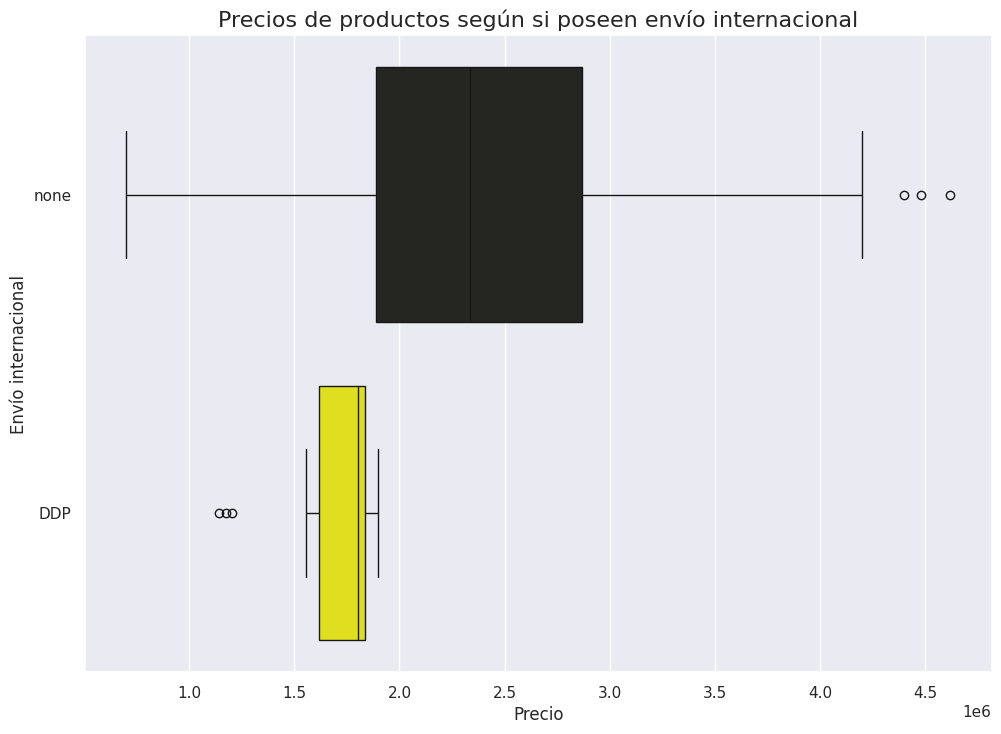

In [263]:
#Boxplot para observar la distribución de precios según si el producto tiene es envio internacional o no
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data= df, x="price", y= "international_delivery_mode" , hue="international_delivery_mode", color="yellow" )
plt.title('Precios de productos según si poseen envío internacional', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Envío internacional', fontsize=12)

* Pese a que los envios con envio internacional son pocos en la muestra, se puede observar un precio promedio menor y mucho menor distribución en la variación de precio. Las "cajas" de los boxplot representan el 50% de la muestra mientras que los "bigotes" representan el resto de la muestra.

* Los puntos fuera de los bigores, son los demoninados outliers , es decir valores atípicos, y se observa que los outliers referidos a productos internacionales son de precio menores mientras que los de origen local son de precios mayores.

# **Conclusiones Finales**

* La muestra analizada está dominada por la publicación de productos nuevos, un 87.85% de las publicaciones corresponden a este tipo de dispositivos y la publicaciones por marca se muestra una competencia fuerte entre Samsung y Apple con un Google rezazgado.

*  Los precios varían significativamente, desde $700.000 hasta $4.619.990, con un promedio de $2.383.578, concentrándose la mayoría en el rango de 1 a 3 millones de ARS.

* La garantía representa un factor clave, ya que el 85.5% de los productos ofrecen garantía de fábrica o del vendedor, mientras que solo el 14.95% no tiene garantía alguna, especialmente en productos usados.

* Referido a envios, solo el 6.54% de las publicaciones son de envío internacional, lo que indica un enfoque principalmente local. Dentro de los productos internacionales, se observa un menor precio promedio así como menor variación.

* Se observa una tendencia al alza en la cantidad de publicaciones, con un pico en octubre de 2024, coincidiendo con el lanzamiento del iPhone 16 y el Google Pixel 9 en septiembre.

*  La mayoría de los vendedores comienzan con 8 productos en stock, aunque algunos llegan a tener hasta 101.

# **Líneas de recomendación**

* Controlar las garantías de fábrica en la venta de modelos usados. Esto puede generarle un problema a la companía, que garantiza la garantía para este tipo de productos.

* Aumentar la cobertura de envios internacionales en la medida de lo posible, eso permitiría abrir el mercado a otros paises y si se mantiene la tendencia de nuestra muestra, ofrecer a los clientes los mismos productos a un precio mucho menor. Cabe aclarar que hay otros impuestos a considerar, como los impuestos de importación y el costo de envio internacional, pero la expansión de este tipo de productos podría representar una oportunidad de crecimiento para la compañia.